# Python exercises for Frequency Domain Chapter


## FFT in Python

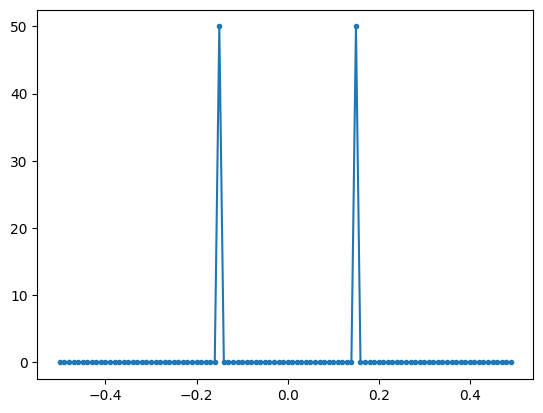

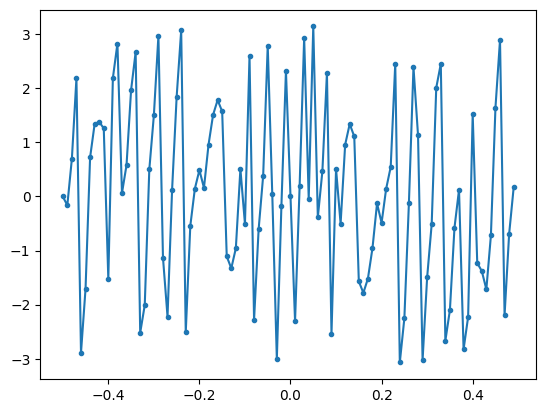

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1  # Hz
N = 100

t = np.arange(N)
s = np.sin(2*np.pi*0.15*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(-Fs/2, Fs/2, Fs/N)
plt.figure(0)
plt.plot(f, S_mag, '.-')
plt.figure(1)
plt.plot(f, S_phase, '.-')
plt.show()

# Windowing 

When we use an FFT to measure the frequency components of our signal, the FFT assumes that it’s being given a piece of a periodic signal. It behaves as if the piece of signal we provided continues to repeat indefinitely. It’s as if the last sample of the slice connects back to the first sample. It stems from the theory behind the Fourier Transform. It means that we want to avoid sudden transitions between the first and last sample because sudden transitions in the time domain look like many frequencies, and in reality our last sample doesn’t actually connect back to our first sample. To put it simply: if we are doing an FFT of 100 samples, using np.fft.fft(x), we want x[0] and x[99] to be equal or close in value.

The way we make up for this cyclic property is through “windowing”. Right before the FFT, we multiply the slice of signal by a window function, which is just any function that tapers to zero on both ends. That ensures the slice of signal will begin and end at zero and connect. Common window functions include Hamming, Hanning, Blackman, and Kaiser. When you don’t apply any windowing, it’s called using a “rectangular” window because it’s like multiplying by an array of ones.

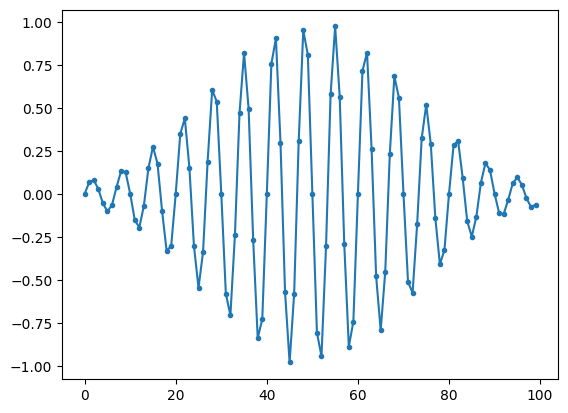

In [3]:
s = np.sin(2*np.pi*0.15*t)
s = s * np.hamming(100)
plt.figure(0)
plt.plot(s, '.-')
plt.show()

# Spectrogram/Waterfall¶


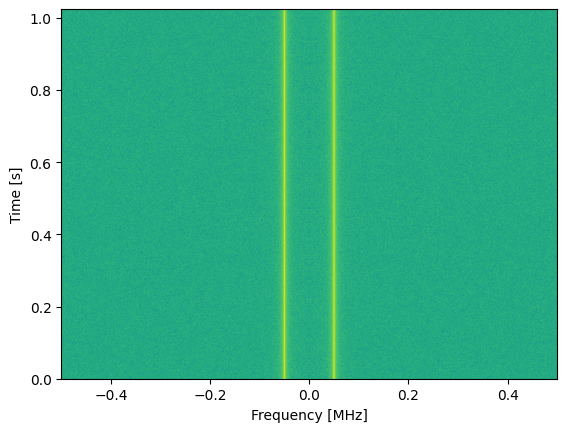

In [4]:
sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))

# simulate the signal above, or use your own signal

fft_size = 1024
num_rows = len(x) // fft_size # // is an integer division which rounds down
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)

plt.imshow(spectrogram, aspect='auto', extent = [sample_rate/-2/1e6, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()